# Advanced Visualizations 2D
---

## 00. Imports

In [112]:
import sys
sys.path.append("../")

In [113]:
import src.utils as utils
import src.plot_utils as plot_utils

In [9]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier as SKRandomForestClassifier

from matplotlib import cm
from sklearn.datasets import make_circles, make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
%matplotlib inline

## 01. Settings

In [10]:
# number of samples in the data set
N_SAMPLES = 1000
# ratio between training and test sets
TEST_SIZE = 0.2

## 02. Create artificial dataset

In [11]:
X1, y1 = make_moons(n_samples=N_SAMPLES, noise=.10)
X2, y2 = make_moons(n_samples=N_SAMPLES, noise=.10)
X2 = - X2 + np.array([1.0, 2.0])
X = np.concatenate((X1, X2))
y = np.concatenate((y1, y2))
X = np.flip(X, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=42)

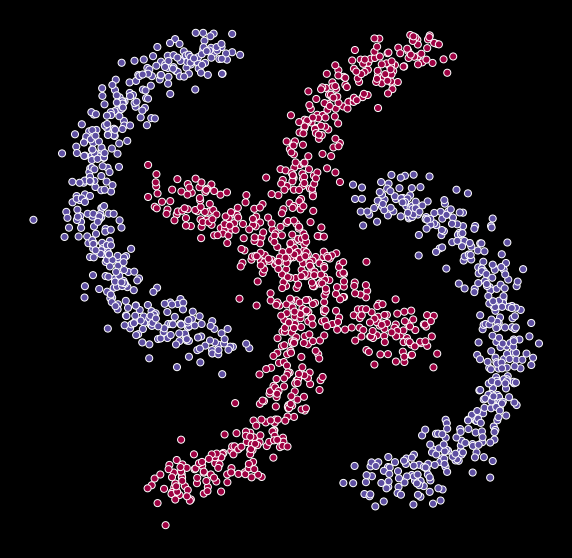

In [12]:
plot_utils.display_2d_data_set(X_train,y_train)

## 03. Adjust decision tree implementation 

In [40]:
class Node:
    def __init__(
        self, 
        node_idx: int,
        assigned_label: int = None,
        split_feature: int = None,
        split_value: float = None
    ) -> None:
        self.node_idx = node_idx
        self.assigned_label = assigned_label
        self.split_feature = split_feature
        self.split_value = split_value
        self.left_child = None
        self.right_child = None


class TreeClassifier:
    def __init__(self, max_depth: int, min_samples_split: int) -> None:
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.root = Node(node_idx=0)

    def fit(self, X: np.array, y: np.array) -> None:
        self.__split(X, y, self.root, 1)

    def predict(self, X: np.array, node_idx: int) -> np.array:
        predictions = np.empty(X.shape[0])
        for idx, x in enumerate(X):
            predictions[idx] = self.__single_example_prediction(x, node_idx)
        return predictions

    def __split(self, X: np.array, y: np.array, node: Node, depth: int) -> None:
        n_samples = y.shape[0]
        
        unique, counts = np.unique(y, return_counts=True)
        node.assigned_label = unique[np.argmax(counts)]

        if n_samples <= self.min_samples_split or depth >= self.max_depth:
            return

        node.split_feature, node.split_value, X_left, X_right, y_left, y_right = \
            utils.find_split(X, y)
        node.left_child, node.right_child = Node(node_idx=2*node.node_idx + 1), Node(node_idx=2*node.node_idx + 2)

        self.__split(X_left, y_left, node.left_child, depth + 1)
        self.__split(X_right, y_right, node.right_child, depth + 1)

    def __single_example_prediction(self, x: np.array, node_idx: int) -> int:
        node = self.root
        while node.right_child is not None and node.left_child is not None and node.node_idx < node_idx / 2:
            if x[node.split_feature] > node.split_value:
                node = node.right_child
            else:
                node = node.left_child
        return node.assigned_label

In [166]:
tree_classifier = TreeClassifier(max_depth=10, min_samples_split=2)
tree_classifier.fit(X_train, y_train)

In [167]:
y_pred = tree_classifier.predict(X_test, 3)
acc = accuracy_score(y_test, y_pred)
print("Accuracy: {0:.2f}%".format(acc * 100))

Accuracy: 82.50%


In [194]:
def display_classification_areas(
        model,
        idx: int,
        cords: np.array,
        labels: np.array,
        output_path: str = None

) -> None:
    x_start = cords[:, 0].min() - 0.5
    x_end = cords[:, 0].max() + 0.5
    y_start = cords[:, 1].min() - 0.5
    y_end = cords[:, 1].max() + 0.5

    grid = np.mgrid[x_start:x_end:100j, y_start:y_end:100j]
    grid_2d = grid.reshape(2, -1).T
    x_grid, y_grid = grid

    prediction = model.predict(grid_2d, idx)

    plt.style.use('dark_background')
    plt.figure(figsize=(10, 10))
    plt.axis('off')
    plt.contourf(x_grid, y_grid, prediction.reshape(100, 100),
                 alpha=0.7, cmap=plt.cm.Spectral)
    plt.scatter(cords[:, 0], cords[:, 1], c=labels.ravel(),
                s=50, cmap=plt.cm.Spectral, edgecolors='white')

    if output_path:
        plt.savefig(output_path, bbox_inches='tight')
        
    plt.show()

In [197]:
def display_2d_data_set(x: np.array, y: np.array, output_path: str = None) -> None:
    x_start = x[:, 0].min() - 0.5
    x_end = x[:, 0].max() + 0.5
    y_start = x[:, 1].min() - 0.5
    y_end = x[:, 1].max() + 0.5

    grid = np.mgrid[x_start:x_end:100j, y_start:y_end:100j]
    grid_2d = grid.reshape(2, -1).T
    x_grid, y_grid = grid
    
    plt.style.use('dark_background')
    plt.figure(figsize=(10, 10))
    plt.axis('off')
    plt.contourf(x_grid, y_grid, x_grid.reshape(100, 100),
                 alpha=0.0, cmap=plt.cm.Spectral)
    plt.scatter(x[:, 0], x[:, 1], c=y.ravel(), s=50,
                cmap=plt.cm.Spectral, edgecolors='white')

    if output_path:
        plt.savefig(output_path, bbox_inches='tight')

    plt.show()

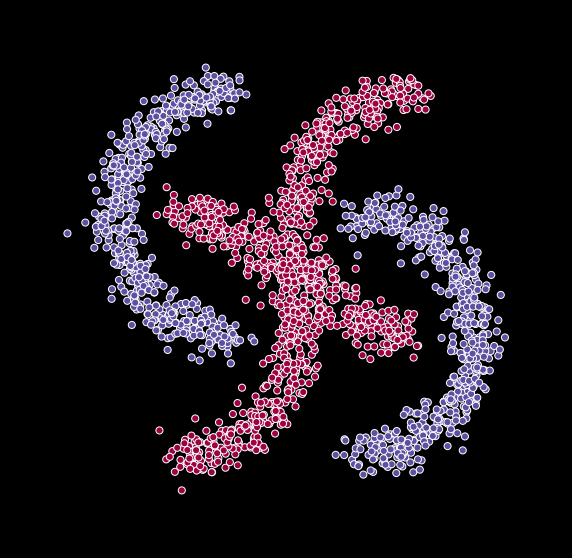

In [198]:
display_2d_data_set(X, y, output_path="../viz/0000.png")

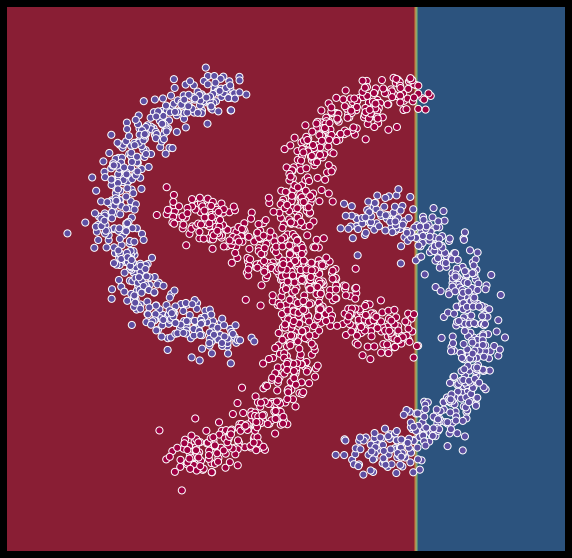

In [199]:
display_classification_areas(tree_classifier, 1, X, y, output_path="../viz/0002.png")

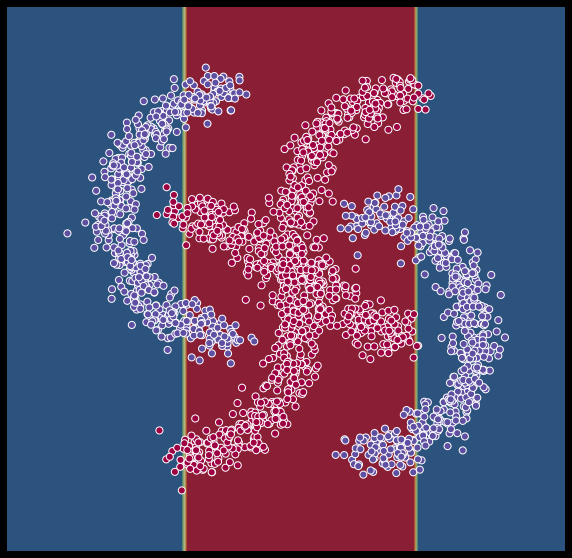

In [200]:
display_classification_areas(tree_classifier, 3, X, y, output_path="../viz/0003.png")

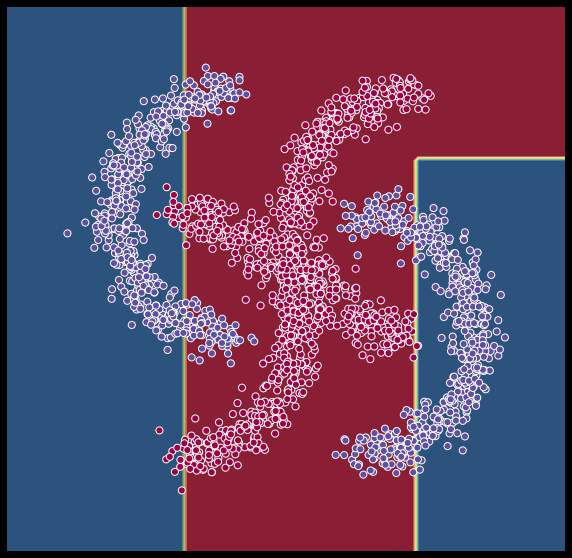

In [201]:
display_classification_areas(tree_classifier, 5, X, y, output_path="../viz/0004.png")

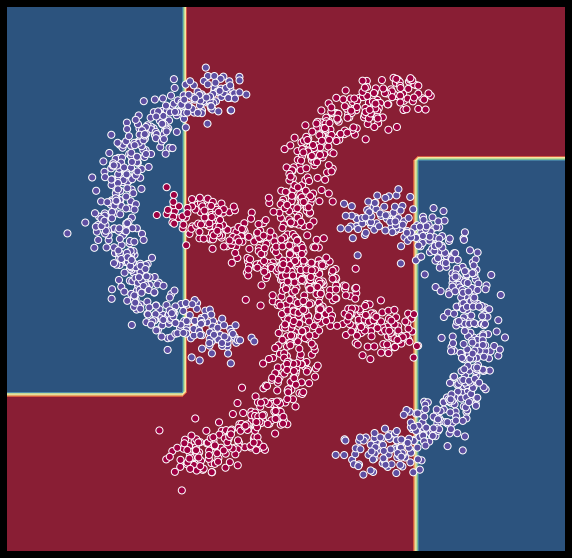

In [202]:
display_classification_areas(tree_classifier, 7, X, y, output_path="../viz/0005.png")

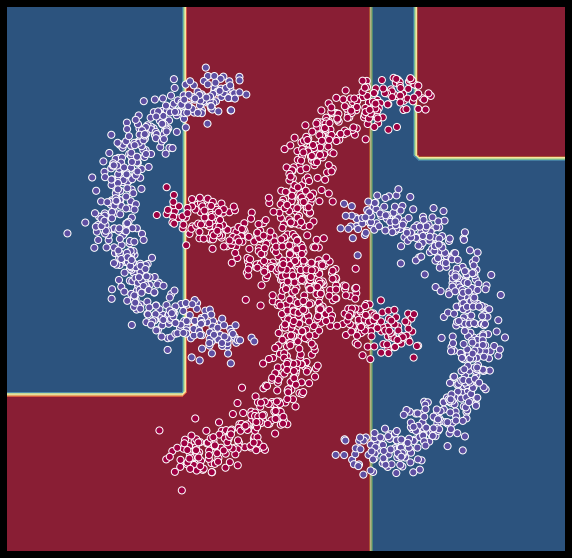

In [203]:
display_classification_areas(tree_classifier, 9, X, y, output_path="../viz/0006.png")

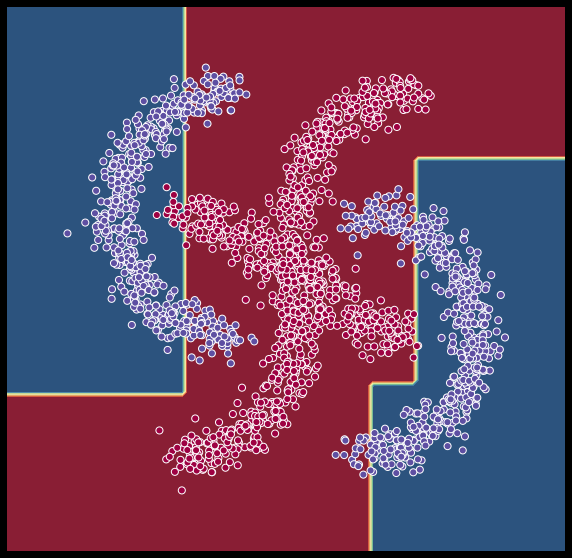

In [204]:
display_classification_areas(tree_classifier, 21, X, y, output_path="../viz/0007.png")

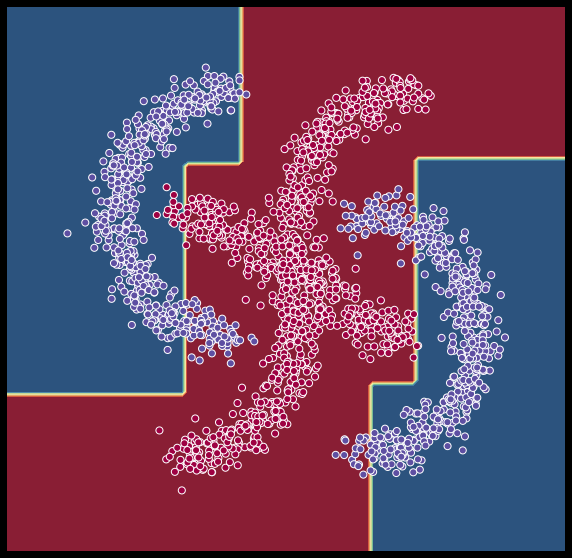

In [205]:
display_classification_areas(tree_classifier, 39, X, y, output_path="../viz/0008.png")

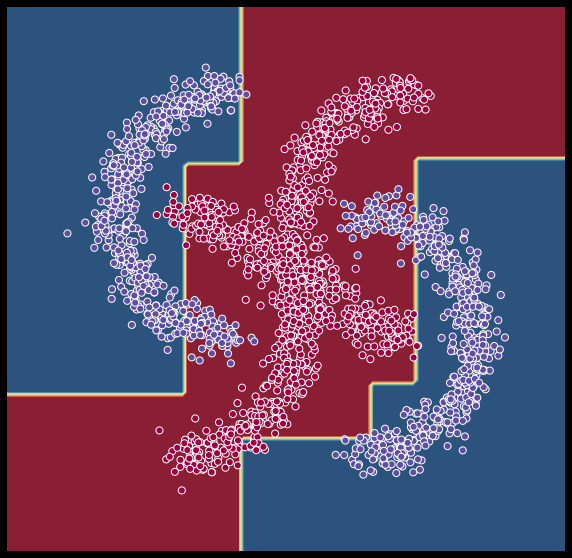

In [206]:
display_classification_areas(tree_classifier, 41, X, y, output_path="../viz/0009.png")

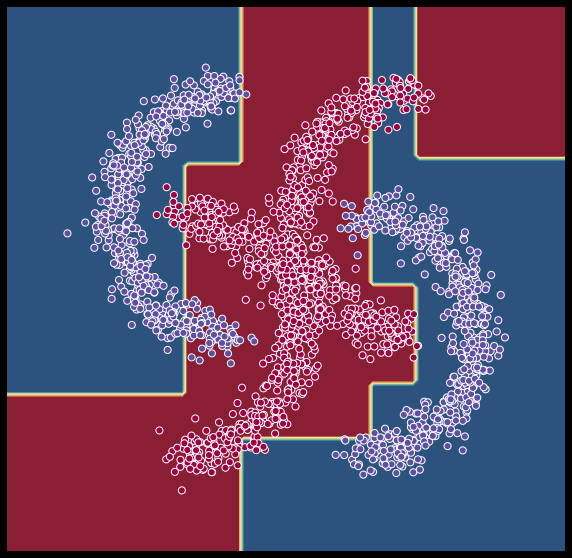

In [207]:
display_classification_areas(tree_classifier, 45, X, y, output_path="../viz/0010.png")

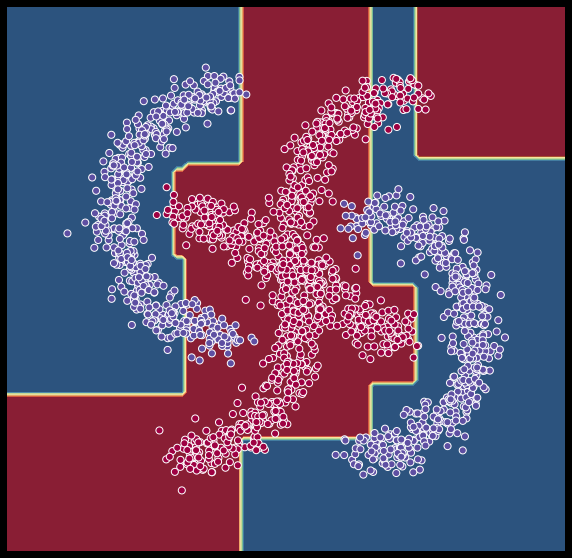

In [208]:
display_classification_areas(tree_classifier, 75, X, y, output_path="../viz/0011.png")

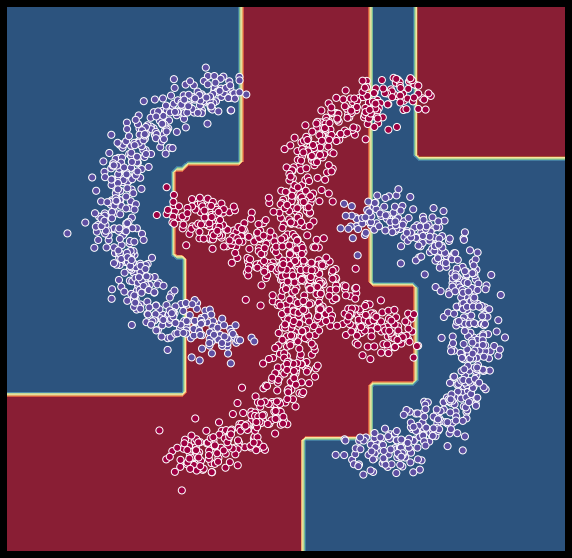

In [209]:
display_classification_areas(tree_classifier, 90, X, y, output_path="../viz/0012.png")

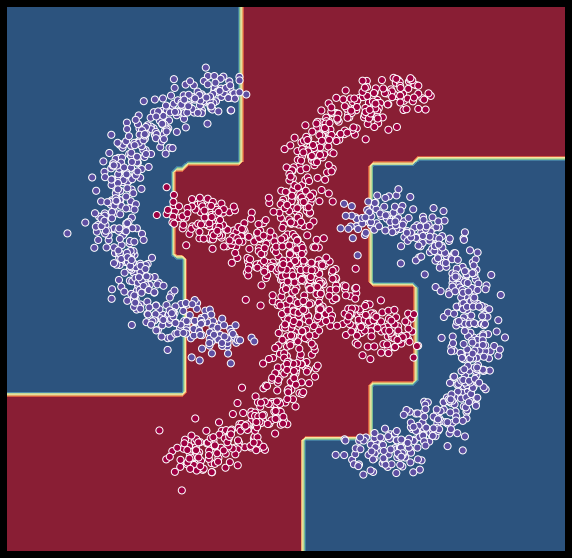

In [210]:
display_classification_areas(tree_classifier, 95, X, y, output_path="../viz/0013.png")

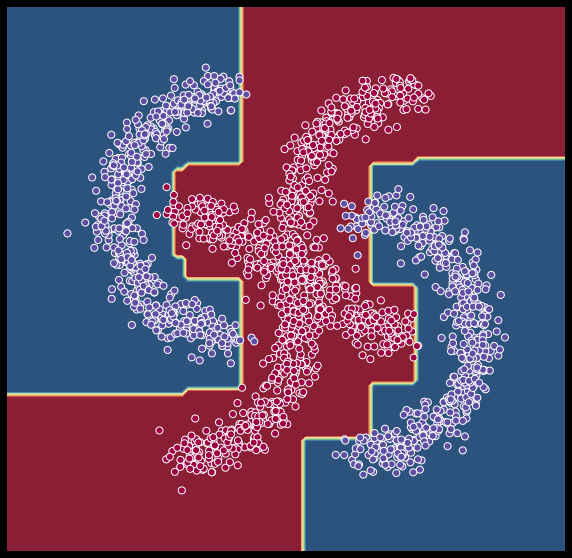

In [211]:
display_classification_areas(tree_classifier, 170, X, y, output_path="../viz/00014.png")

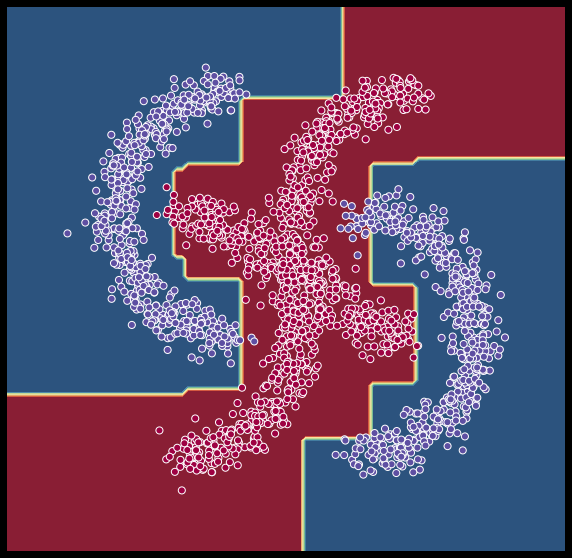

In [212]:
display_classification_areas(tree_classifier, 200, X, y, output_path="../viz/0015.png")

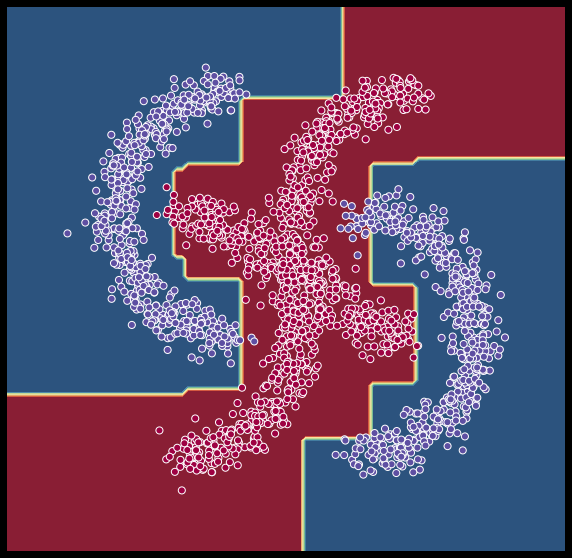

In [213]:
display_classification_areas(tree_classifier, 250, X, y, output_path="../viz/0016.png")